# Plan

1. Rearrange the files into train/test/valid folders separated into the two classes dogs and cats
2. Create sample set along with the above folders
3. Finetune and train model
4. Generate predictions
5. Validate predictions
6. Submit to kaggle

## Rearrange files

In [1]:
import os, sys, glob, numpy as np
current_dir = os.getcwd()
CODE_DIR = current_dir
DATA_DIR = current_dir + "/data"
%pwd

'/home/niraj/FastAI/catsdogs'

In [2]:
%cd $DATA_DIR
%mkdir -p train/dogs
%mkdir -p train/cats
%mkdir -p sample/test
%mkdir -p sample/train/dogs
%mkdir -p sample/train/cats
%mkdir -p sample/valid/dogs
%mkdir -p sample/valid/cats
%mkdir -p valid/dogs
%mkdir -p valid/cats
%mkdir results

/home/niraj/FastAI/catsdogs/data


## Todo: Make a folder inside results and move all the test images in that folder

In [3]:
%cd $DATA_DIR/train
images = glob.glob("*.jpg")
print(len(images))
for i in range(25000):
    if("cat" in images[i]):
        os.rename(images[i], DATA_DIR + "/train/cats/" + images[i])
    else:
        os.rename(images[i], DATA_DIR + "/train/dogs/" + images[i])

/home/niraj/FastAI/catsdogs/data/train
25000


In [4]:
%cd $DATA_DIR/train/dogs
dog_images = glob.glob("*.jpg")
for i in range(1000):
    os.rename(dog_images[i], DATA_DIR + "/valid/dogs/" + dog_images[i])

/home/niraj/FastAI/catsdogs/data/train/dogs


In [5]:
%cd $DATA_DIR/train/cats
cat_images = glob.glob("*.jpg")
for i in range(1000):
    os.rename(cat_images[i], DATA_DIR + "/valid/cats/" + cat_images[i])   

/home/niraj/FastAI/catsdogs/data/train/cats


In [6]:
from shutil import copyfile

In [7]:
%cd $DATA_DIR/train/dogs
dog_images = glob.glob("*.jpg")
for i in range(100):
    copyfile(dog_images[i], DATA_DIR + "/sample/train/dogs/" + dog_images[i])

%cd $DATA_DIR/train/cats
cat_images = glob.glob("*.jpg")
for i in range(100):
    copyfile(cat_images[i], DATA_DIR + "/sample/train/cats/" + cat_images[i]) 

/home/niraj/FastAI/catsdogs/data/train/dogs
/home/niraj/FastAI/catsdogs/data/train/cats


In [8]:
%cd $DATA_DIR/valid/dogs
dog_images = glob.glob("*.jpg")
for i in range(25):
    copyfile(dog_images[i], DATA_DIR + "/sample/valid/dogs/" + dog_images[i])

%cd $DATA_DIR/valid/cats
cat_images = glob.glob("*.jpg")
for i in range(25):
    copyfile(cat_images[i], DATA_DIR + "/sample/valid/cats/" + cat_images[i])

/home/niraj/FastAI/catsdogs/data/valid/dogs
/home/niraj/FastAI/catsdogs/data/valid/cats


In [30]:
%cd $CODE_DIR

/home/niraj/FastAI/catsdogs


# Import necessary modules and set appropriate paths

In [2]:
%matplotlib inline
import json
from importlib import reload
import utils; reload(utils)
from utils import *
from matplotlib import pyplot as plt
import vgg16; reload(vgg16)
from vgg16 import Vgg16

Using TensorFlow backend.
/home/niraj/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
path = DATA_DIR
train_path = path + "/train"
valid_path = path + "/valid"
result_path = DATA_DIR + "/results"
test_path = DATA_DIR + "/test"

In [4]:
batch_size=64
no_of_epochs=5

# Finetune over batches of images

In [5]:
vgg = Vgg16()
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)

batches.nb_class = 2
batches.nb_sample = batches.samples
val_batches.nb_class = 2
val_batches.nb_sample = val_batches.samples

vgg.finetune(batches)

/home/niraj/FastAI/catsdogs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/niraj/FastAI/catsdogs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/niraj/FastAI/catsdogs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/niraj/FastAI/catsdogs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Train the model

In [35]:
vgg.model.load_weights(result_path + "/" + "ft0.h5")

In [6]:
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print("Running epoch: {}".format(epoch+1))
    vgg.fit(batches, val_batches, batch_size, nb_epoch=1)
    latest_weights_filename = "ft" + str(epoch+1) + ".h5"
    vgg.model.save_weights(result_path+"/"+latest_weights_filename)
print("Completed {} fit operations".format(no_of_epochs))

Running epoch: 1
Epoch 1/1
360/360 [==============================] - 86s 238ms/step - loss: 1.4263 - acc: 0.8710 - val_loss: 0.9621 - val_acc: 0.9167
Running epoch: 2
Epoch 1/1
360/360 [==============================] - 83s 231ms/step - loss: 1.4721 - acc: 0.8888 - val_loss: 1.1278 - val_acc: 0.9153
Running epoch: 3
Epoch 1/1
360/360 [==============================] - 84s 233ms/step - loss: 1.4769 - acc: 0.8931 - val_loss: 1.0051 - val_acc: 0.9263
Running epoch: 4
Epoch 1/1
360/360 [==============================] - 85s 235ms/step - loss: 1.4978 - acc: 0.8945 - val_loss: 1.1413 - val_acc: 0.9160
Running epoch: 5
Epoch 1/1
360/360 [==============================] - 90s 251ms/step - loss: 1.4907 - acc: 0.8975 - val_loss: 1.1125 - val_acc: 0.9230
Completed 5 fit operations


# Generate predictions

In [55]:
vgg.model.load_weights(result_path + "/ft2.h5")

In [56]:
batches, predictions = vgg.test(test_path, batch_size = batch_size)

Found 12500 images belonging to 1 classes.


In [57]:
expected_class = batches.classes
filenames = batches.filenames

#Round our predictions to 0/1 to generate labels
our_predictions = predictions[:,1]
our_labels = np.round(our_predictions)
print(our_predictions[:5])
print(our_labels[:5])

[  9.9893e-01   8.8729e-04   3.2916e-04   9.9998e-01   6.4718e-02]
[ 1.  0.  0.  1.  0.]


In [40]:
from PIL import Image
im = Image.open(test_path + "/" + filenames[11])
im.show()

# Submit to Kaggle

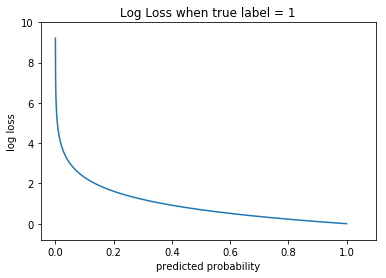

In [20]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probabilty that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

x = [i*.0001 for i in range(1,10000)]
y = [log_loss([0],[[i*.0001,1-(i*.0001)]],eps=1e-15, labels=[0,1]) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()

In [58]:
# From the above image and prediction we notice that the second column is dog and first is cat.
isdog = predictions[:,1]
# We round it to such numbers to decrease the penalty for wrong predictions (due to log loss as potrayed in the above cell)
isdog = isdog.clip(0.05,0.95)

In [59]:
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
sub = np.stack([ids,isdog],axis=1)
sub[:5]

array([[  1.0000e+00,   9.5000e-01],
       [  1.0000e+01,   5.0000e-02],
       [  1.0000e+02,   5.0000e-02],
       [  1.0000e+03,   9.5000e-01],
       [  1.0000e+04,   6.4718e-02]])

In [60]:
%cd $CODE_DIR
submission_file_name = 'submission_v2.csv'
np.savetxt(submission_file_name, sub, fmt='%d,%.5f', header='id,label', comments='')

/home/niraj/FastAI/catsdogs


In [61]:
from IPython.display import FileLink
%cd $CODE_DIR
FileLink(submission_file_name)

/home/niraj/FastAI/catsdogs


/home/niraj/FastAI/catsdogs/submission_v2.csv